In [1]:
# Notebook to analyse Bookkeeper General Batavia files for rises in opium trade
# DHBenelux 2024

# Author: marieke.van.erp@dh.huc.knaw.nl 

In [9]:
# Load necessary packages 
import pandas as pd 
import numpy as np

In [7]:
# Load data 
df_cargo  = pd.read_excel('bgb.xlsx', sheet_name='bgb_cargo')
df_product = pd.read_excel('bgb.xlsx', sheet_name='bgb_product')
df_voyage = pd.read_excel('bgb.xlsx', sheet_name='bgb_voyage')

In [13]:
df_intermediate = df_cargo.merge(df_product,left_on='carProductId', right_on='id', how='left')
df = df_intermediate.merge(df_voyage, left_on='carVoyageId', right_on='voyId',how='left')


,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,timestamp,voySourceId,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields_y,first_ship_name
0,645880,99353,1290.0,NaN,NaN,NaN,NaN,1623.3,1623.0,3.0,...,2013-09-10 14:30:24,147.0,3.0,NaN,NaN,3185.0,3129.0,3,3 Batavia Batavia Amsterdam Republiek 1790 1...,Doggersbank
1,645881,99353,1230.0,848.0,88.0,4,4.0,371.8,371.0,8.0,...,2013-09-10 14:30:24,147.0,3.0,NaN,NaN,3185.0,3129.0,3,3 Batavia Batavia Amsterdam Republiek 1790 1...,Doggersbank
2,645877,99353,1133.0,16295.0,88.0,4,4.0,NaN,NaN,NaN,...,2013-09-10 14:30:24,147.0,3.0,NaN,NaN,3185.0,3129.0,3,3 Batavia Batavia Amsterdam Republiek 1790 1...,Doggersbank
3,645878,99353,1133.0,848.0,88.0,6,6.0,NaN,NaN,NaN,...,2013-09-10 14:30:24,147.0,3.0,NaN,NaN,3185.0,3129.0,3,3 Batavia Batavia Amsterdam Republiek 1790 1...,Doggersbank
4,645879,99353,1157.0,NaN,88.0,65,65.0,1487.17,1487.0,17.0,...,2013-09-10 14:30:24,147.0,3.0,NaN,NaN,3185.0,3129.0,3,3 Batavia Batavia Amsterdam Republiek 1790 1...,Doggersbank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253385,903925,117548,1290.0,NaN,69.0,6,6.0,NaN,NaN,NaN,...,2013-09-10 14:34:05,109.0,18122.0,NaN,Semarang and Surabaya are listed as places of ...,3129.0,3133.0,167,18122 Java's Noordoostkust Batavia Batavia Se...,Middelwoud
253386,903928,117422,1290.0,NaN,69.0,4,4.0,NaN,NaN,NaN,...,2013-09-10 14:34:04,109.0,17996.0,NaN,Due to the poor state of this year's BGB journ...,3129.0,3076.0,109,17996 Cochin Malabar Batavia Batavia Due to th...,Linschoten
253387,903927,117422,2364.0,2744.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2013-09-10 14:34:04,109.0,17996.0,NaN,Due to the poor state of this year's BGB journ...,3129.0,3076.0,109,17996 Cochin Malabar Batavia Batavia Due to th...,Linschoten
253388,903929,113648,2364.0,2744.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2013-09-10 14:33:50,107.0,14241.0,NaN,"81.914,6 Dutch guilders = 102.392,17,8 Indian ...",3185.0,3129.0,11,14241 Batavia Batavia Amsterdam Republiek 81.9...,Mijnden


In [14]:
for col in df.columns:
    print(col)

carId
carVoyageId
carProductId
carSpecificationId
carUnit
carQuantity
carQuantityNumeric
carValue
carValueGuldens
carValueStuivers
carValuePenningen
carValueLicht
carValueLichtGuldens
carValueLichtStuivers
carValueLichtPenningen
carRemarks
carOrder
changed_when_x
changed_by_x
timestamp_x
all_fields_x
id
naam
added_when
added_by
timestamp_y
url
voyId
voyBookingDay
voyBookingMonth
voyBookingYear
voyDeparturePlaceId
voyDepartureDay
voyDepartureMonth
voyDepartureYear
voyArrivalPlaceId
voyArrivalDay
voyArrivalMonth
voyArrivalYear
voyInvoiceValue
voyInvoiceValueLicht
voyRemarksForEditor
voyageDAS
created_when
created_by
changed_when_y
changed_by_y
timestamp
voySourceId
voynumber
voyImage
voyRemarksForEndUser
voyDepartureRegioId
voyArrivalRegioId
voyFolioNummer
all_fields_y
first_ship_name


In [15]:
pruned_dataframe = df[['naam', 'carQuantity','carValue', 'carValueGuldens',
                       'carValueStuivers','carValuePenningen','voyBookingYear']].copy()

In [16]:
pruned_dataframe


,naam,carQuantity,carValue,carValueGuldens,carValueStuivers,carValuePenningen,voyBookingYear
0,samen,NaN,1623.3,1623.0,3.0,NaN,1790.0
1,zakhorloge,4,371.8,371.0,8.0,NaN,1790.0
2,moiré,4,NaN,NaN,NaN,NaN,1790.0
3,moiré,6,NaN,NaN,NaN,NaN,1790.0
4,perpetuanen,65,1487.17,1487.0,17.0,NaN,1790.0
...,...,...,...,...,...,...,...
253385,samen,6,NaN,NaN,NaN,NaN,1723.0
253386,samen,4,NaN,NaN,NaN,NaN,1723.0
253387,roodaarde,NaN,NaN,NaN,NaN,NaN,1723.0
253388,roodaarde,NaN,NaN,NaN,NaN,NaN,1715.0


In [18]:
a = pruned_dataframe['naam'].unique()

In [22]:
opium_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'opium']

In [23]:
opium_rows

,naam,carQuantity,carValue,carValueGuldens,carValueStuivers,carValuePenningen,voyBookingYear
896,opium,4359,"21.075,7,8",21075.0,7.0,8.0,1780.0
965,opium,1920,9279.5,9279.0,5.0,NaN,1780.0
1157,opium,500,"0,0,0",0.0,0.0,0.0,1790.0
1487,opium,12300,"499.631,17,8",499631.0,17.0,8.0,1780.0
4081,opium,347,218421.15,218421.0,15.0,NaN,1787.0
...,...,...,...,...,...,...,...
244774,opium,50818,NaN,NaN,NaN,NaN,1729.0
244801,opium,535xx,NaN,NaN,NaN,NaN,1729.0
244830,opium,26100,NaN,NaN,NaN,NaN,1729.0
244861,opium,29000,NaN,NaN,NaN,NaN,1729.0


In [30]:
import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=opium_rows[''], y=opium_rows['carValueGuldens'])])
fig.show()


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

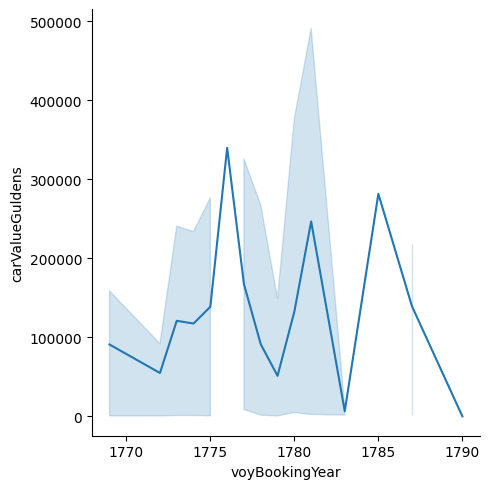

In [35]:
sns.relplot(x='voyBookingYear', y='carValueGuldens', data=opium_rows, kind='line')

In [37]:
# OK, let's do this a bit neater and average the value in guilders per year
opium_value_per_year = opium_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()

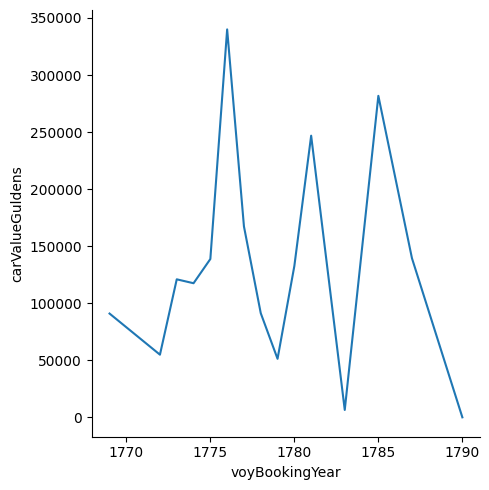

In [38]:
sns.relplot(x='voyBookingYear', y='carValueGuldens', data=opium_value_per_year, kind='line')

In [39]:
kaneel_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'kaneel']

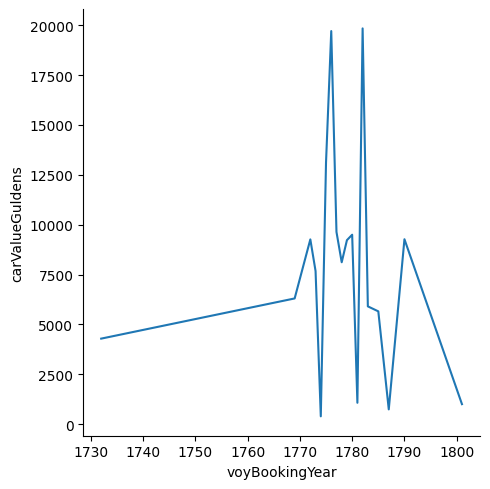

In [40]:
# OK, let's do this a bit neater and average the value in guilders per year
kaneel_value_per_year = kaneel_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
sns.relplot(x='voyBookingYear', y='carValueGuldens', data=kaneel_value_per_year, kind='line')

<Axes: xlabel='voyBookingYear', ylabel='carValueGuldens'>

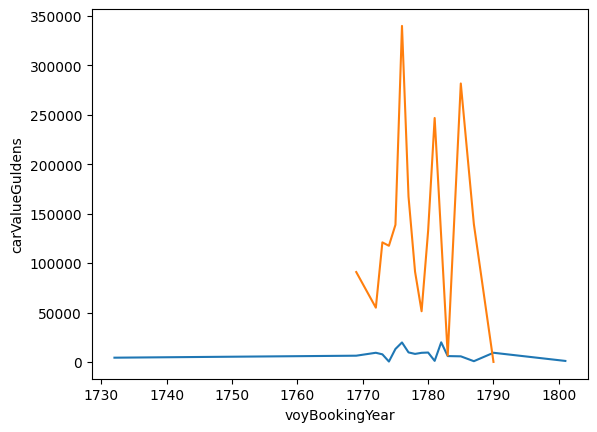

In [42]:
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=kaneel_value_per_year)
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=opium_value_per_year)

In [43]:
value_per_year = pruned_dataframe.groupby(['voyBookingYear', 'naam'], as_index=False)['carValueGuldens'].mean()
value_per_year

,voyBookingYear,naam,carValueGuldens
0,1701.0,'s lands recht,NaN
1,1701.0,ABC-boek,NaN
2,1701.0,Catechismus,NaN
3,1701.0,Kort Begrijp,NaN
4,1701.0,Letterkonst,NaN
...,...,...,...
31204,1801.0,zegel,988.000000
31205,1801.0,zeil,NaN
31206,1801.0,zilverwerk,NaN
31207,1801.0,zink,151.500000


In [53]:
# OK, this is too big to plot, so let's only plot the most valuable commodities 
value_per_commodity = pruned_dataframe.groupby('naam', as_index=False)['carValueGuldens'].mean().dropna()
# Let's take cinnamon as a value to compare against 
#value_per_commodity.loc[value_per_commodity['naam'] == 'kaneel']
# the answer is 8008.770186  very hacky, I'm hardcoding it here 
# select only the commodities that have a value higher than that of cinnamon:
valuable_goods = value_per_commodity[value_per_commodity.carValueGuldens > 8008]

In [54]:
# only select the valuable goods from the value_per_year df
only_high_value_per_year = value_per_year[value_per_year['naam'].isin(valuable_goods['naam'])]

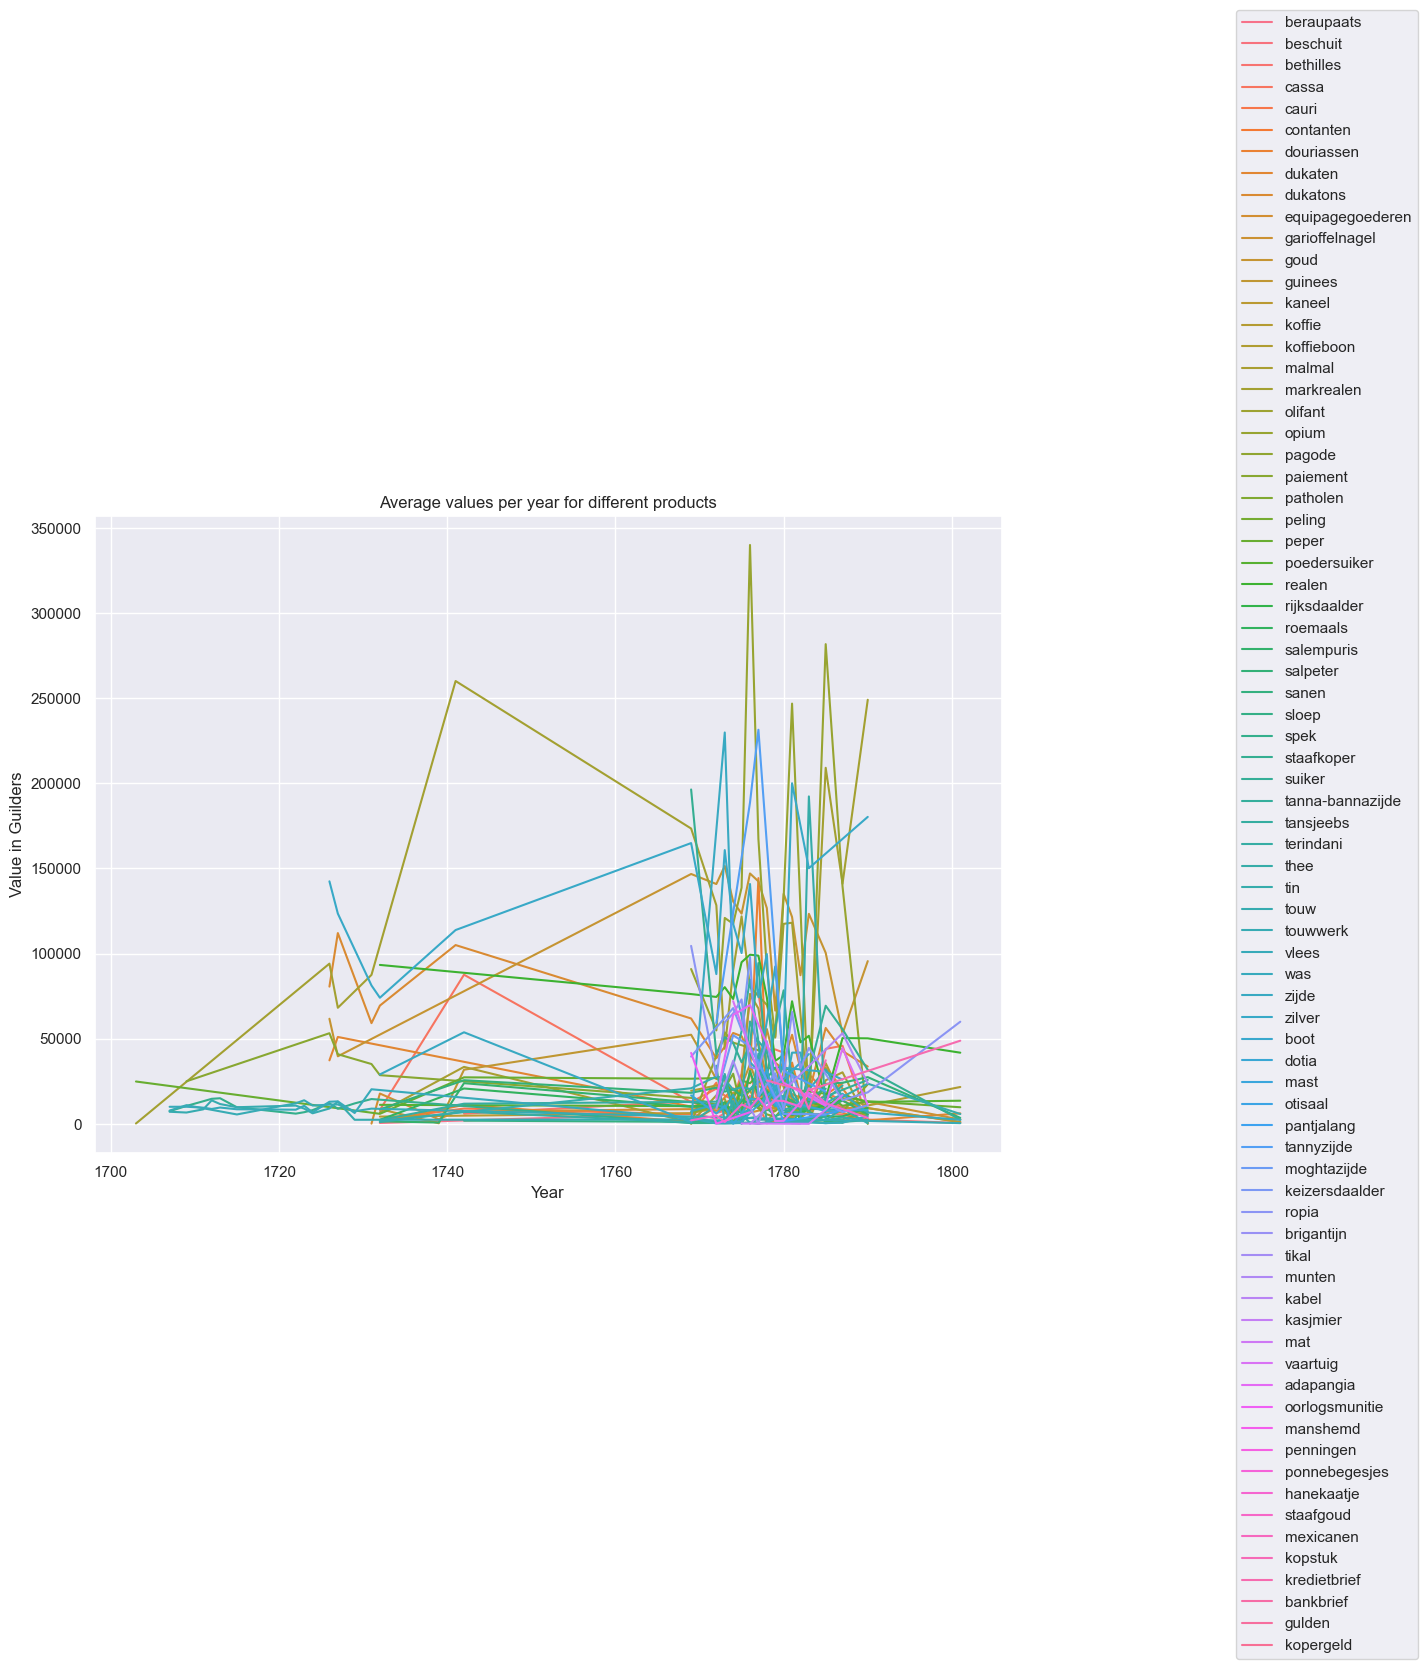

In [71]:
# This is going to be one big spaghetti as it has all the commodities, grouped by year
# and averaged by value in guilders 
#sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=value_per_year, hue='naam')
# this was too big to plot, so I'm trying:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(x='voyBookingYear', y='carValueGuldens', 
             data=only_high_value_per_year , hue='naam'
            ).set(title='Average values per year for different products', xlabel='Year', ylabel='Value in Guilders')
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [101]:
import altair as alt
#alt.renderers.enable('notebook')

chart = alt.Chart(only_high_value_per_year).mark_line().encode(
    x='voyBookingYear',
    y='carValueGuldens',
    color='naam',
).properties(
    width=800,
    height=300
)
chart.save('altair_chart.html')

In [130]:
# Get number of ships that transport opium per year 
opium_counter = opium_rows.groupby('voyBookingYear').size().reset_index(name='counts')
opium_counter['naam']='opium'

In [133]:
arak_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'arak']
arak_counter = arak_rows.groupby('voyBookingYear').size().reset_index(name='counts')
jenever_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'jenever']
jenever_counter = jenever_rows.groupby('voyBookingYear').size().reset_index(name='counts')
snuiftabak_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'snuiftabak']
snuiftabak_counter = snuiftabak_rows.groupby('voyBookingYear').size().reset_index(name='counts')
snuiftabak_counter['naam']='snuiftabak'
jenever_counter['naam']='jenever'
arak_counter['naam']='arak'

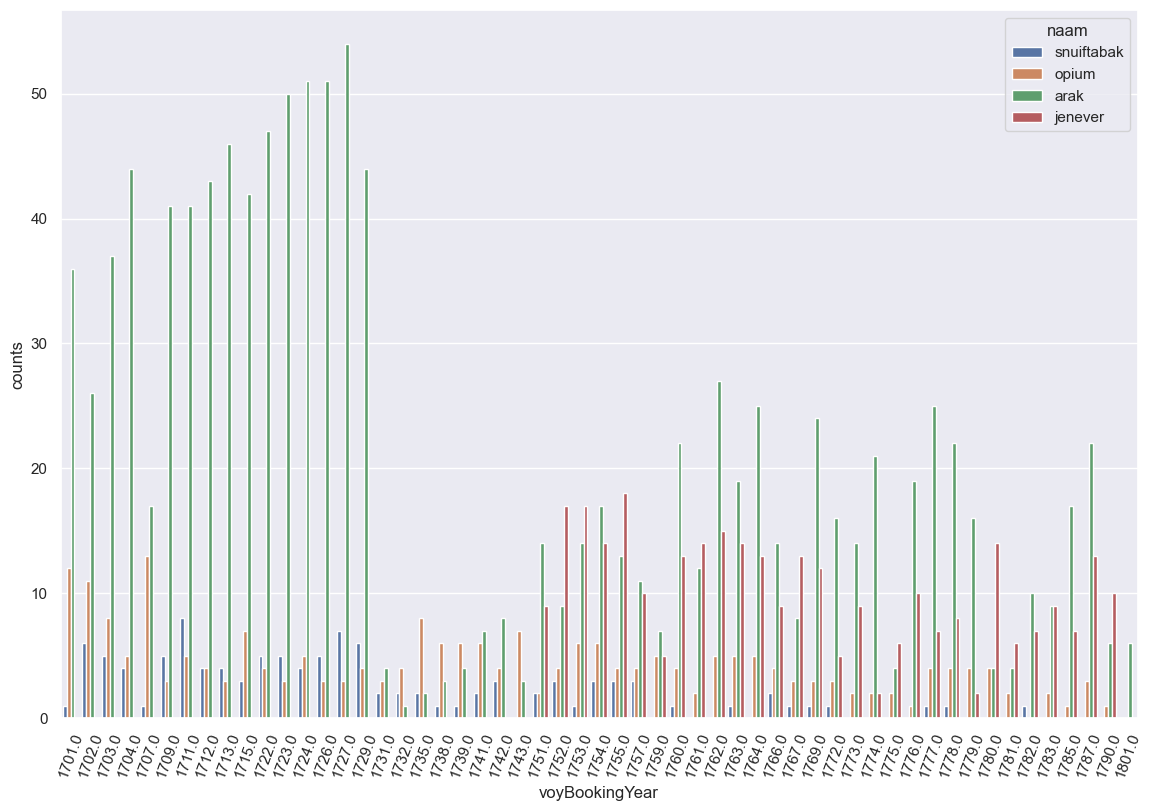

In [136]:
dss = pd.concat([jenever_counter, snuiftabak_counter, opium_counter, arak_counter])
sns.barplot(x='voyBookingYear', y='counts', hue='naam', data=dss)
plt.xticks(rotation=70)
plt.tight_layout()

pandas.core.frame.DataFrame